# Doing Physics With Python

Julie Butler 

June 2021

Physics Immersion Week

Pre-Reading Notebook **4/4**

Please complete this notebook before class on June 21, 2021.

</br>

If you have any questions while working through this notebook, please feel free to contact Julie Butler at butle222@msu.edu or Morten Hjorth-Jensen at hjensen@msu.edu.

</br>

If you want to use this notebook in Google Colab click [this link](https://colab.research.google.com/drive/1K_oK6ItXexWsKBZ9JfRs6Rnl6eijM7wo?usp=sharing) (make sure you are logged into your Google account).  Once the webpage opens up click `File > Save copy a in Drive'.  Then go to your own Google Drive account and use the copy.

</br>

## Doing Physics on a Computer

A typical physics research problem looks something like this:

1. Develop a theory that predicts the behavior of a system of interest
2. Plan an experiment that can prove your theory
3. Run the experiment and collect data
4. Compare the results of your experiment to the results of your theoretical calculations.  If they do not match, then come up with an explanation (either something is wrong with the theory or something is wrong with the experiment)

Doing physics with a computer looks almost exactly like this expect instead of running a hands-on experiment you use a computer simulation.  The goal of this week is to get you comfortable with modeling physics systems with computer simulations and to get you use to the typical workflow of a physics research problem (i.e. Develop theoretical results $\rightarrow$ Plan the simulation $\rightarrow$ Run the simulation and collect data $\rightarrow$ Compare the results of your simulation to your theoretical calculations).

## An Introduction to Our Problem

The goal of this notebook is to model the motion of a ball after it is kicked through the air.  This is a very simple problem.  You have probably solved this problem in an introductory physics class on paper, but now we want to solve it on the computer.  This notebook walks your through some important background knowledge, shows you the equations needed to solve the problem computationally, and then slowly walks you through the code.  It is important that you understand each section before moving on so if you have any questions, please feel free to contact the instructors by email or Slack.

## Review of the basic equations of motion

All problems in classical mechanics start out with a force being applied to an object.  We typically assume that the force does not vary with time but it may vary due to some other variables like position.  Using Newton's second law, we can write an equation of force as follows:

$$F = ma \quad \rightarrow \quad a = F/m$$

Remember that both force and acceleration are vectors, so we can write Newton's second law in vector form as:

$$\vec{F} = m\vec{a} \quad \rightarrow \quad \vec{a} = \vec{F}/m$$

Note that we solved both of the above equations for the acceleration.  Acceleration (which as units of m/s$^2$) will tell us everything we need to know about how our object moves.

The first quantitiy we can derive from acceleration is the velocity.  Acceleration is the time derivative of velocity, meaning that we can find the velocity from acceleration by taking the intergral from an initial time t$_0$ to an arbitrary later time t:

$$v(t) = \int_{t_0}^t a dt = v_0 + at,$$

where we have defined the constant v$_0$ as the velocity at the initial time (i.e. as the initial velocity).  This value is typically given in the problem statement or is assumed to be zero.

Remember that acceleration is a vector (and by extension velocity is a vector), so we can rewrite the above equations in vector form as:

$$\vec{v}(t) = \int_{t_0}^t \vec{a} dt = \vec{v}_0 + \vec{a}t = \langle v_{0,x} + a_xt, v_{0,y} + a_yt, v_{0,z} + a_zt \rangle$$

The next quantity we can derive from the acceleration is the position of the object as a function of time.  We can find the position by taking the double integral of acceleration with respect to tme of accleration or the integral of velocity with respect to time.

$$x(t) = \int_{t_0}^t\int_{t_0}^t adt = \int_{t_0}^t (v_0 + at)dt = x_0 + v_0t + \frac{1}{2}at^2$$

Here we have used a similar notation to define the initial position to be x$_0$, which is likewise usually given in the problem statement.

Finally, position (like velocity and acceleration) is a vector, so we can write the position as a vector like this:


$$\vec{r}(t) = \vec{r}_0 + \vec{v}_0t + \frac{1}{2}\vec{a}t^2 = \langle r_{0,x} + v_{0,x}t + \frac{1}{2}a_xt^2, r_{0,y} + v_{0,y}t + \frac{1}{2}a_yt^2, r_{0,z} + v_{0,z}t + \frac{1}{2}a_zt^2 \rangle$$

## Review of the gravitational force (near-Earth) and Drag

Now that we have built up how a force causes motion on an object, let's look at the specific forces that we need for this application.  We are interested in modeling a ball's flight path near the surface of the Earth, so we need to consider two forces: near-Earth gravitational force and drag.  

The force on an object caused by the Earth's gravity when an object is near the Earth's surface is:

$$\vec{F}_g = -m\vec{g}, \quad \vec{g} = \langle 0, 9.81 \rangle \frac{m}{s^2}$$

where we have also defined the gravitational constant g.  This force equation applies to all objects as long as they are relatively near to the Earth's surface (within ~20km).  This equation is actually just an approximation of the general Newtonian gravitation equation for the force between two bodies:

$$F_{1 \rightarrow 2} = -G\frac{m_1m_2}{|r|^2}\hat{r}$$

We can get the near-Earth gravitational equation by setting g = Gm$_E$/|r$_E$|$^2$, where m$_E$ is the mass of the Earth and r$_E$ is the radius of the Earth.


Next, we need to consider the force on an object caused by air resistance.  We call this force drag and it is a unique force.  Instead of depending directly on time or position like most forces, it depends on the velocity of the object.  We can write an equation for the drag force of an object using the following equation:

$$F_D(t) = mD\vec{v}(t)|\vec{v}(t)|,$$

where D is a constant that depends on the shape of the object, but is usually between 0 and 1.  Since the drag force depends on velocity we call it a non-conservative force, meaning that an energy is not conserved when this force is used.  You can read more about conservative and non-conservative forces [here](https://mhjensen.github.io/Physics321/doc/LectureNotes/_build/html/chapter4.html) (see section 4.4).

## Review of basic energy equations

There are two types of energy we need to consider for our baseball problem, kinetic energy and near-Earth gravitational potential energy.

First let's look at kinetic energy.  We can write the kinetic energy of an object as 

$$T = K = \frac{1}{2}mv^2 = \frac{p^2}{2m},$$

where p = mv is the momentum of the object.  The kinetic energy is the energy an object gets from moving.

Secondly we can define the near-Earth gravitational potential as:

$$V_g(y) = mgy$$

where g is the same constant as defined above and y is the distance of the object above the surface of the Earth.  It would appear that F$_g$ and V$_g$ are related and this would bring up an important relationship between potentials and their related force.  A force can be created from a potential with the following relationship:

$$ F(x,t) = \nabla V(x, t) \quad \rightarrow \quad \nabla = \frac{\partial}{\partial x} + \frac{\partial}{\partial y} + \frac{\partial}{\partial z}$$

where $\nabla$ is known as the gradient operator and is made up of partial derivatives.

## The Velocity-Verlet Method

You may not be familar with the Velocity-Verlet method but it is a way to arrange the equations of motion such that a computer can calculate the path an object will take given a certain force.  The Velocity-Verlet Method is part of a family of computational physics methods that also includes Euler and Euler-Cromer.  You can read about the Euler and Euler-Cromer methods [here](https://mhjensen.github.io/Physics321/doc/LectureNotes/_build/html/chapter3.html).

### The Need to Discretize

All of the equations shown above are for __continous times__ meaning that you can plug in any time value and get an answer.  This works great when solving things by hand, but not so much when we need to use a computer.  Computers need __discretized values__, meaning that we need to rewrite our above equations for motion so that they accept tiny chunks of time $\Delta$t, instead of a continous variable t.

This means that our discretized times will be as follows, with the initial time being t$_0$ and $\Delta t$ being our time step, which is typically a very small number.

$$t = {t_0, t_0 + \Delta t, t_0 + 2\Delta t, t+0 + 3\Delta t, ...} = {t_0, t_1, t_2, t_3, ...},$$

where the subscript on t represents which time step we are considering.  These are the only times we can use in our calculations, but with $\Delta$t being very small, we can still get approximate almost any time.

The equations for the Velocity-Verlet method are as follows (note that the order is important):

$$x_{i+1} = x_i + v_i\Delta t + \frac{(\Delta t)^2}{2}a_i$$

$$v_{i+1} = v_i + \frac{\Delta t}{2}(a_{i+1} + a_i)$$


In the above equations variable i runs from 0 to N, where N is the total number of time steps.  Here we have also used a subscript to represent a shorthand notation for a time step.  For example: v$_2$ = v(t$_2$) = v(t$_0$ + 2$\Delta$t).  You can read more about the Velocity-Verlet method [here](https://mhjensen.github.io/Physics321/doc/LectureNotes/_build/html/chapter4.html) (see section 4.5.1 for a derivation of the equations).

Velocity-Verlet is different from other computational methods like Euler or Euler-Cromer because it conserves the energy of the system it is modelling (if energy should be conserved).  This may not be true of other methods.


## Modelling the Motion of a Ball

### Before you look at the code, answer the following questions on a piece of paper:
1. Assuming there is no drag force, draw the general shape you would expect for the following graphs and explain why they have those shapes:
    * Time on the x-axis and y-position of the ball on the y-axis
    * Time on the x-axis and x-position of the ball on the y-axis
    * Time on the x-axis and y-velocity of the ball on the y-axis
    * Time on the x-axis and x-velocity of the ball on the y-axis
2. Assuming no air resistance and that the ball being kicked weights 0.1kg and is kicked with an initial velocity of 15m/s at an angle of 45$^\circ$, how far will the ball travel in the x-direction and how high will it fly in the y-direction.  How much time will the ball spend in the air?
3. What initial conditions did you use to solve the above problem (i.e. velocity and position)?
4. Without air resistance, should energy be conserved in this problem?  What about with air resistance?
5. Qualitatively, what do you expect to happen to the motion of the ball once drag is added?

These questions are designed to help you get answers to some theoretical questions and calcualtions so we will know what to look for when we run our simulation.

**When going through the code below, make sure that you are running each code cell you get to.  All code cells need to be run in order for the code to work.**

Setting up the import statements for the relevant libraries. Numpy is imported so we can use arrays, math is needed for a couple math functions, and matplotlib is needed for graphing.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

Here we are just giving numerical values to some of the constants in our equations.  g is the near-Earth gravitational constant, D is the drag coefficeint, and m is the mass of the ball.  After you run through this code, come back here and change the values of D and m and see how that changes the final result.

In [53]:
g = 9.80655 #m/s^2 g to 6 leading digits after decimal point
D = 0.00245 #m/s
m = 0.1 # kg

Define Gravitational force as a vector in x and y. It is a constant.
Here we are using a 1D array of length two to represent a point in the
xy coordinate plane. The first coordinate is the x direction and the second is the y direction.  This equation says that the near-Earth
gravitational force will be pointing downwards in only the y direction,
which lines up with what we would expect.

In [54]:
Fg = -m*g*np.array([0.0,1])  

Setting up the discretized timing data.  We are using a step size of 0.01. n is the total number of time steps between 0s and tfinal with `ceil` being the ceiling function from the math library.  Make sure that equation makes sense to you before moving on

In [55]:
DeltaT = 0.01
tfinal = 2.5
n = ceil(tfinal/DeltaT)

set up arrays for t, v, and x

Note that the outer arrays have n elements for all quantities, because that is the number of points we are going to calculate.  Also note that time is a 1D array because it is a scalar but velocity and position (being vectors) are 2D arrays

In [56]:
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))

Now that we have the arrays that will hold our data, let's add the initial conditions as the first elements (i.e. index of 0).

In [57]:
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([0.0,0.0])
theta = np.pi/4 #45 degrees in radians
speed = 15
v0 = np.array([speed*np.cos(theta),speed*np.sin(theta)])
# Adding the initial conditions to the data arrays
r[0] = r0
v[0] = v0

### Calculation Loop

Now to implement the Velocity-Verlet method.  We will do this with a for loop that loops over all possible indices of the data arrays.  Here we are setting the drag force to be zero so we do not have to worry about air resistance.  Go through each line of the below code and make sure it makes sense before you move onto the next section.  Make sure you know where each of the equations comes from.

In [68]:
# Start integrating using the Velocity-Verlet method
for i in range(0, n-1):
    # Set up forces, air resistance FD,  Here we are setting it to zero so we 
    # do not have to worry about it
    FD = np.array([0.0, 0.0])
    # Final net forces acting on falling object
    Fnet = FD+Fg
    # The accelration at a given time t_i (using Newton's Laws)
    a = Fnet/m
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    # Note that this acceleration does not change with position
    anew = Fnet/m
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT

### Data Analysis

Now that we have collected our data, we need to do some analysis to it.  This is a common work flow in physics research.  First we need to take our data and format it in a way that is better for our analysis.  In this case we want to separate the x data from the y data.  We do this through a method called index splicing.  Note the sequence of characters inside the square brackets (`[]`) on the lines below.  The first character, a colon (`:`), tells Python that we are interested in every row in the data set.  The comma after the colon tells Python we are moving from talking about rows to talking about columns.  Finally the number after the comma tells Python which column we want to extract.  So the first column (index 0) corresponds to x data and the second column (index 1) corresponds to y data.

Before moving on, make sure this all makes sense to you, both the syntax and why it works.  Print out some of the data sets in the code cell below if you think it will help.

In [69]:
x_position = r[:,0]
y_position = r[:,1]

x_velocity = v[:,0]
y_velocity = v[:,1]

The next four code cells graph the data we just extracted as a function of time.  We are using the same graphing procedures you learned in Notebook 3.  Refer back to that notebook if you need help understanding the code.

### Answer the following questions on a piece of paper:
1. Do the below four graphs match what you drew before looking at the code.  If there are any discrepancies what do you think would have caused those?
2. Do you think there is a better way to graph the data than on the four separate graphs below?  If so, add a code cell below this one and implement your plan.

Text(0.5, 0, 'time (s)')

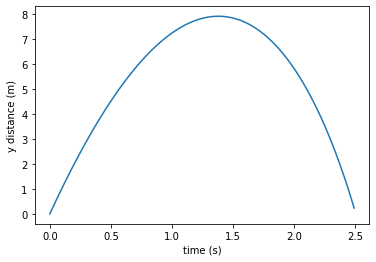

In [63]:
plt.plot(t, y_position)
plt.ylabel('y distance (m)')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

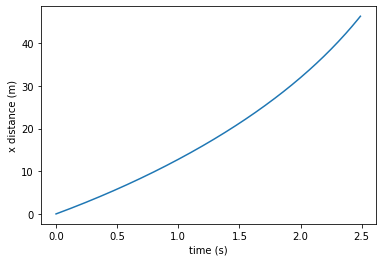

In [64]:
plt.plot(t, x_position)
plt.ylabel('x distance (m)')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

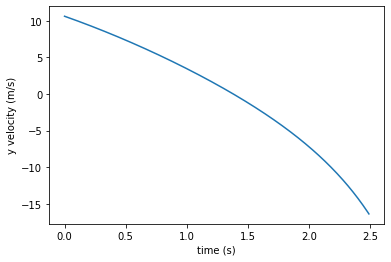

In [65]:
plt.plot(t, y_velocity)
plt.ylabel('y velocity (m/s)')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

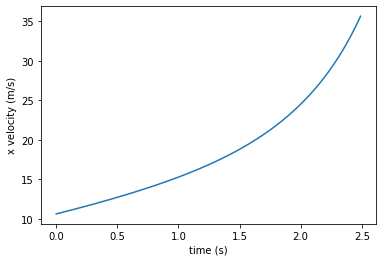

In [66]:
plt.plot(t, x_velocity)
plt.ylabel('x velocity (m/s)')
plt.xlabel('time (s)')

Now, let's examine the maximum x position the ball achieved in our simulation (its range) and what was the maximum y position it reached.  We will do this using the `np.max` function from the NumPy library.  Make sure you look back at Notebook 2 if this is not familar.

### Answer these questions on a piece of paper:
1. Do the answers below match what you calculated before looking at the code.  If not, what do you think caused this problem?  Hint, look at the graph for y-position and also compare the total flight time you calcualted to the `tfinal` value in the simulation.  Can you edit the code to make the code match your theoretical answers?

In [ ]:
print("The maximum x position is", np.max(x_position))
print("The maximum y position is", np.max(y_position))

Finally, we will perform one last analysis.  As we discussed earlier in this notebook the two types of energies we need to be concerned about in this problem are near-Earth gravitationl potential energy and kinetic energy.  Let's compute the total energy at every time step and graph it as a function of time to see what we get.  Before moving on make sure lines 1-4 make sense to you.  Make sure you know where the equations come from and how they were translated into code. 

### Answer these questions on a piece of paper:
1. Based on the graph, is energy conserved or not?
2. Does this match what you predicted before running the code.

[11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25
 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25 11

Text(0.5, 0, 'Time (s)')

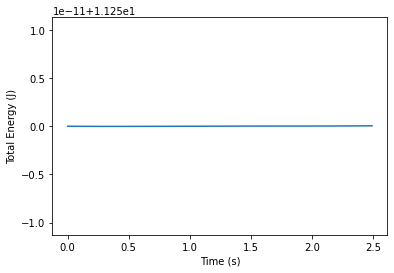

In [71]:
# Near-Earth Gratitational Potential Energy
Vg = m*g*y_position
# The magnitude of the velocity vector
v_scalar = np.sqrt(x_velocity**2 + y_velocity**2)
# Kinetic energy
T = 0.5*m*v_scalar**2
# Total energy
E = Vg + T
print(E)

plt.plot(t, E)
plt.ylabel("Total Energy (J)")
plt.xlabel('Time (s)')

### Coding Exercises

### Answer these questions on a separate piece of paper:
1. Change the value of dt to 0.00001 and rerun all of the code cells. Do you notice any differences in the results?  If so, what do you think caused it. 
2. Change the value of dt to 0.5 and rerun all of the code cells. Do you notice any differences in the results?  If so, what do you think caused it. 


Edit the calcualtion loop above so that the drag force is not zero but matches the physical equation (change dt back to its original value).  Note that the drag coefficient, D, has already be defined for you.  After you add in your equation, rerun all the code cells and see if you get the resutls you expect.  If you need a hint, see the code cell below, but only after you have tried it yourself first.

### Answer these questions on a separate piece of paper:
1. Do the graphs of position and velocity differ when drag is added?  If so how?
2. Do the maximum values of the x and y position change with drag?  Are they bigger or smaller?  Does it make sense that the changed as they did?
3. Is energy still conserved?  Why or why not?

In [ ]:
# HINT FOR ADDING DRAG
# See the bottom of the cell, but only after attempting it yourself first
# SPOILERS BELOW:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
FD = D*v[i]*np.sqrt(v[i][0]**2 + v[i][1]**2)